In [73]:
import cv2
import matplotlib.pyplot as plt

In [74]:
config_file = 'C:\\Users\\Dell\\Downloads\\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'C:\\Users\\Dell\\Downloads\\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\\ssd_mobilenet_v3_large_coco_2020_01_14\\frozen_inference_graph.pb'

In [75]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [76]:
classbabels = []
file_name = 'C:\\Users\\Dell\\Downloads\\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\\coco.txt'
with open(file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [77]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [78]:
print(len(classlabels))

80


In [79]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))  # Pass mean values as a tuple
model.setInputSwapRB(True)

< cv2.dnn.Model 0000017CCC31D350>

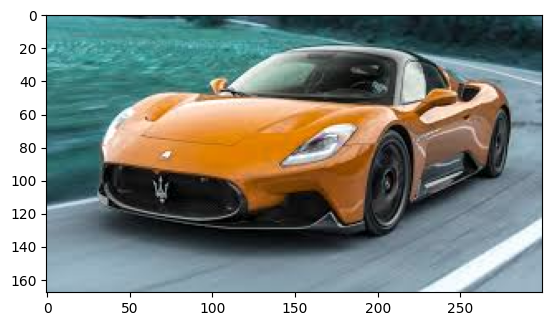

In [80]:
img = cv2.imread('C:\\Users\\Dell\\Downloads\\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\\images.jpg')
plt.imshow(img)

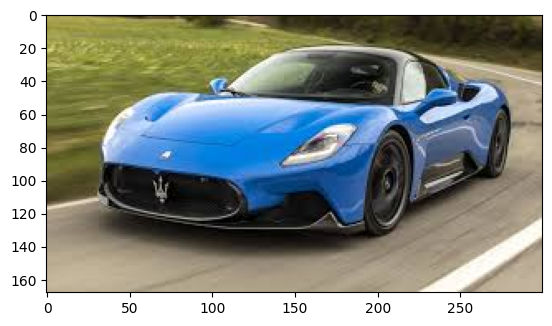

In [81]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [82]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [83]:
print(ClassIndex)

[3]


In [84]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex, confidece, bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

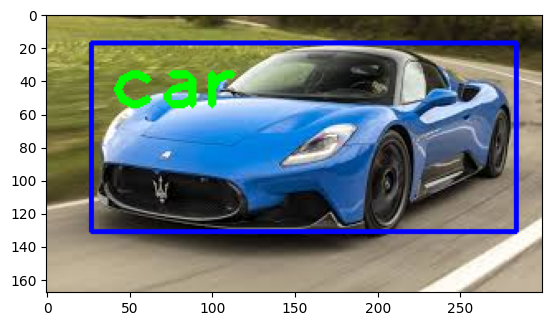

In [85]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Video capture opened successfully.
[ 1  1 62 62  1 62  1]


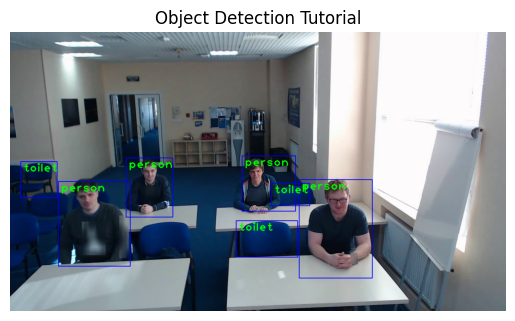

[ 1  1 62  1 62  1]


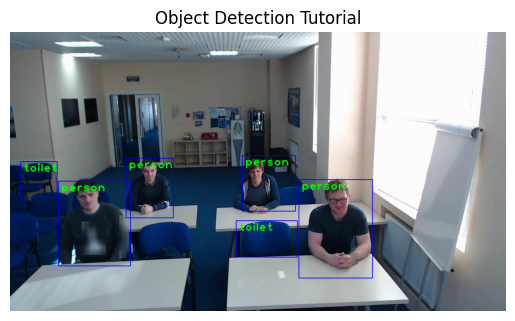

[ 1  1 62  1  1 62]


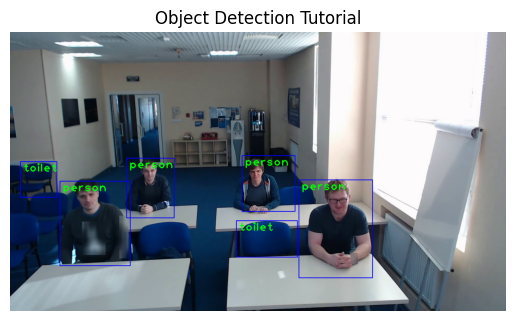

Maximum duration reached. Ending the video capture.


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [86]:
import cv2
import time
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("classroom.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video")

print("Video capture opened successfully.")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

max_duration = 2
start_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    # Convert the frame to RGB (matplotlib uses RGB, OpenCV uses BGR)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the frame using matplotlib
    plt.imshow(frame_rgb)
    plt.title('Object Detection Tutorial')
    plt.axis('off')
    plt.show()

    # if cv2.waitKey(2) & 0xFF == ord('q'):
    #     break

    if time.time() - start_time > max_duration:
        print("Maximum duration reached. Ending the video capture.")
        break

cap.release()
cv2.destroyAllWindows()

# #video & webcam capture
# import time
# cap = cv2.VideoCapture("classroom.mp4")

# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cannot Open Video")

# print("Video capture opened successfully.")

# font_scale = 3
# font = cv2.FONT_HERSHEY_PLAIN

# max_duration = 30
# start_time = time.time()

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break

#     ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
#     print(ClassIndex)
#     if(len(ClassIndex) != 0):
#         for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
#           if(ClassInd<=80):
#             cv2.rectangle(frame, boxes, (255, 0, 0), 2)
#             cv2.putText(frame, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

#     cv2.imshow('Object Detection Tutorial', frame)

#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break

#     if time.time() - start_time > max_duration:
#         print("Maximum duration reached. Ending the video capture.")
#         break

# cap.release()
# cv2.destroyAllWindows()